In [67]:
import sys
import os
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlrose_hiive as mlrose

from src.experiments.Rastrigin import Rastrigin
from src.experiments.FitnessByStateSize import FitnessByStateSize
from src.experiments.FitnessLearningCurve import FitnessLearningCurve
from src.experiments.FitnessValidationCurve import FitnessValidationCurve
from src.experiments.EvalOptimizationAlgorithm import EvalOptimizationAlgorithm

from src.models.MIMIC import MIMIC
from src.models.GeneticAlgorithm import GeneticAlgorithm
from src.models.SimulatedAnnealing import SimulatedAnnealing
from src.models.RandomizedHillClimbing import RandomizedHillClimbing

from src.plots.FitnessComparison import FitnessComparison
from src.plots.FuncCallsByStateSizeComparison import FuncCallsByStateSizeComparison
from src.plots.FitnessValidationCurve import FitnessValidationCurve as FitnessValidationCurvePlot
from src.plots.OptimizationFitTimes import OptimizationFitTimes

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
rand_hill_climb = RandomizedHillClimbing(max_attempts=80, max_iters=np.inf)

sim_ann = SimulatedAnnealing(
    max_attempts=40, 
    max_iters=np.inf,
    schedule=mlrose.ExpDecay(init_temp=10, exp_const=0.001, min_temp=0.00001),
#     schedule=mlrose.GeomDecay(init_temp=10, decay=0.99, min_temp=0.001)
)
gen_alg = GeneticAlgorithm(
    max_attempts=5, 
    population_size=90,
    mutation_prob=0.01,
    max_iters=np.inf
)
mimic = MIMIC(
    max_attempts=3, 
    max_iters=np.inf, 
    population_size=45, 
    keep_pct=0.3
)

models = [rand_hill_climb, sim_ann, gen_alg, mimic]

In [63]:
state_size_experiments = [
    FitnessByStateSize(
        mod, 
        Rastrigin, 
        state_sizes=np.arange(10, 160, 30), 
        verbose=False
    ) for mod in models
]

In [64]:
for exp in state_size_experiments:
    print('\nExperiment for {0}\n'.format(exp.model))
    exp.run()


Experiment for <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>


Experiment for <SimulatedAnnealing, schedule: 10, max_attempts: 40, max_iters: inf>


Experiment for <GeneticAlgorithm, population_size: 90, mutation_prob: 0.01, max_attempts: 5, max_iters: inf>


Experiment for <MIMIC, population_size: 100, keep_pct: 0.2, max_attempts: 2, max_iters: inf>



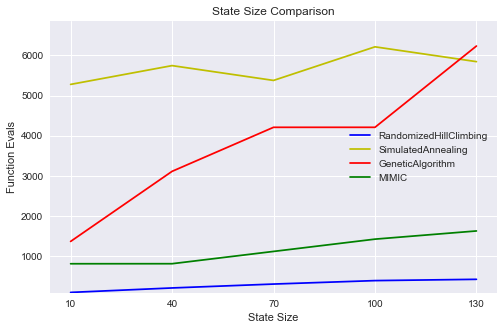

In [65]:
func_calls_comp = FuncCallsByStateSizeComparison(experiments=state_size_experiments)
fig, ax = func_calls_comp.plot()

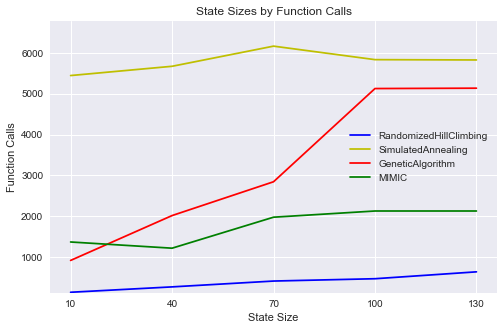

In [21]:
func_calls_comp = FuncCallsByStateSizeComparison(experiments=state_size_experiments)
fig, ax = func_calls_comp.plot()

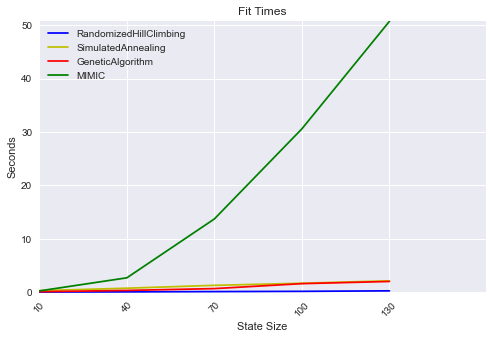

In [22]:
comp_fit_times = OptimizationFitTimes(experiments=state_size_experiments)
fig, ax = comp_fit_times.plot()

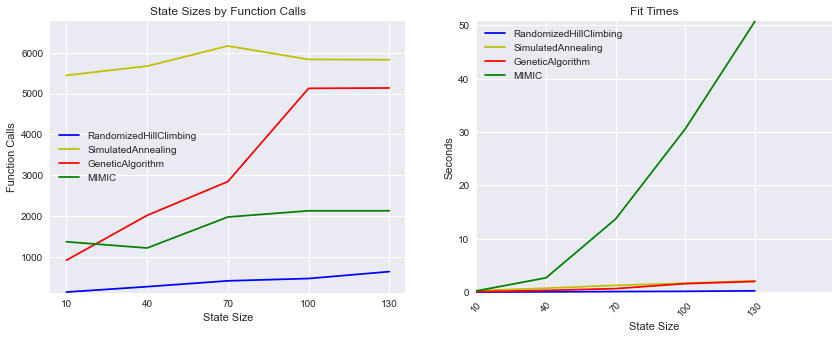

In [23]:
state_sizes_fig, axs = plt.subplots(1, 2, figsize=(14, 5))
_, ax = func_calls_comp.plot(ax=axs[0])
_, ax = comp_fit_times.plot(ax=axs[1])

In [24]:
state_sizes_fig.savefig(
    "../out/Rastrigin State Sizes.png",
    bbox_inches='tight',
    dpi=800
)

In [25]:
max_iters_experiments = [
    FitnessValidationCurve(
        mod, 
        Rastrigin,
        state_size=100,
        param_name='max_iters',
        param_range=np.arange(1, 25, 5),
        verbose=False
    ) for mod in models
]
for exp in max_iters_experiments:
    exp.run()

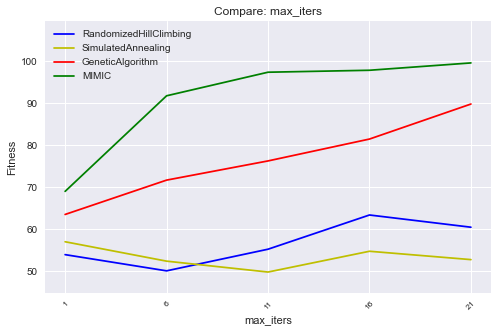

In [28]:
max_iters_comp = FitnessComparison(experiments=max_iters_experiments)
fig, ax = max_iters_comp.plot()

In [31]:
max_attempts_experiments = [
    FitnessValidationCurve(
        mod, 
        Rastrigin,
        state_size=100,
        param_name='max_attempts',
        param_range=np.arange(1, 9, 1),
        verbose=False
    ) for mod in models
]
for exp in max_attempts_experiments:
    exp.run()

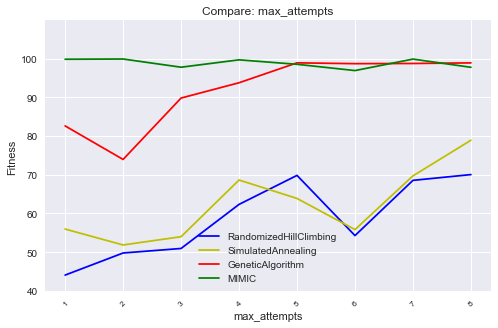

In [32]:
max_attempts_comp = FitnessComparison(experiments=max_attempts_experiments)
fig, ax = max_attempts_comp.plot()

In [33]:
mimics = [
    MIMIC(population_size=10, keep_pct=0.2, max_attempts=5, max_iters=np.inf),
    MIMIC(population_size=50, keep_pct=0.2, max_attempts=5, max_iters=np.inf),
    MIMIC(population_size=90, keep_pct=0.2, max_attempts=5, max_iters=np.inf),
    MIMIC(population_size=130, keep_pct=0.2, max_attempts=5, max_iters=np.inf),
]

In [36]:
population_experiments = [
    FitnessValidationCurve(
        mod, 
        Rastrigin,
        state_size=100,
        param_name='max_iters',
        param_range=np.arange(1, 25, 5),
        verbose=False,
        name="{}-{}".format(type(mod).__name__, mod.population_size)
    ) for mod in mimics
]

In [37]:
for exp in population_experiments:
    exp.run()

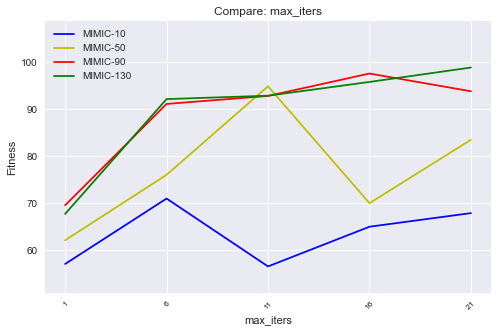

In [38]:
population_comp = FitnessComparison(experiments=population_experiments)
fig, ax = population_comp.plot()

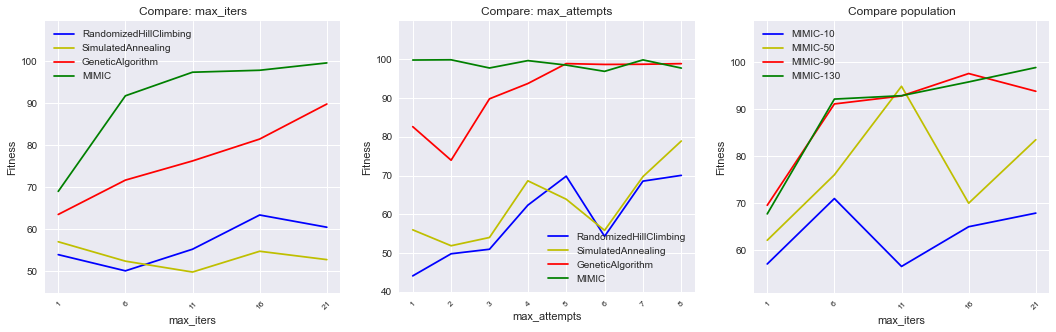

In [49]:
fitness_fig, axs = plt.subplots(1, 3, figsize=(18, 5))
_, ax = max_iters_comp.plot(ax=axs[0])
_, ax = max_attempts_comp.plot(ax=axs[1])
_, ax = population_comp.plot(ax=axs[2], title="Compare population")

In [50]:
fitness_fig.savefig(
    "../out/Rastrigin Fitness Comparison.png",
    bbox_inches='tight',
    dpi=800
)

## Evaluations

In [70]:
problem = Rastrigin(state_size=100)
eval_experiments = [EvalOptimizationAlgorithm(model, problem, trials=5, verbose=True) for model in models]

In [71]:
for eval_exp in eval_experiments:
    eval_exp.fit()

1 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 728.2443379189568
	fit_time 0.37178802490234375
	func_calls 482.0
	iterations 432
2 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 725.9583450749756
	fit_time 0.3794729709625244
	func_calls 993.0
	iterations 463
3 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 725.3688876852683
	fit_time 0.35391879081726074
	func_calls 1459.0
	iterations 420
4 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 724.3623952730477
	fit_time 0.25746893882751465
	func_calls 1804.0
	iterations 295
5 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 727.0612379654145
	fit_time 0.3526120185852051
	func_calls 2283.0
	iterations 429
<RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	Mean fitness: 726.1990407835326
	Mean Fit Time: 0.3430521488

In [61]:
for eval_exp in eval_experiments:
    eval_exp.fit()

1 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 99.6885608608802
	fit_time 0.133713960647583
	func_calls 430.0
	iterations 385
2 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 96.92950572035167
	fit_time 0.10299801826477051
	func_calls 802.0
	iterations 334
3 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 98.22383534287137
	fit_time 0.10400605201721191
	func_calls 1176.0
	iterations 321
4 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 96.991672014667
	fit_time 0.13233304023742676
	func_calls 1653.0
	iterations 423
5 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 98.18497927227308
	fit_time 0.12548398971557617
	func_calls 2109.0
	iterations 405
<RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	Mean fitness: 98.00371064220867
	Mean Fit Time: 0.1197070121765

In [58]:
for eval_exp in eval_experiments:
    eval_exp.fit()

1 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 96.97289725686711
	fit_time 0.10146117210388184
	func_calls 311.0
	iterations 263
2 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 98.86580834136376
	fit_time 0.13382220268249512
	func_calls 793.0
	iterations 426
3 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 98.22393377977062
	fit_time 0.12084197998046875
	func_calls 1228.0
	iterations 386
4 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 95.1804874407298
	fit_time 0.0916450023651123
	func_calls 1558.0
	iterations 289
5 - <RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	best_fitness 99.60824283684597
	fit_time 0.13098597526550293
	func_calls 2033.0
	iterations 420
<RandomizedHillClimbing, restarts: 0, max_attempts: 80, max_iters: inf>:
	Mean fitness: 97.77027393111545
	Mean Fit Time: 0.1157512664